### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

### Import Data 

In [2]:
plant_1 = pd.read_csv('Plant_1_Generation_Data.csv')
plant_1['DATE_TIME'] = pd.to_datetime(plant_1['DATE_TIME'],format='%d-%m-%Y %H:%M')
plant_1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [3]:
plant_2 = pd.read_csv('Plant_2_Generation_Data.csv')
plant_2['DATE_TIME'] = pd.to_datetime(plant_2['DATE_TIME'],format='%Y-%m-%d %H:%M')
plant_2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


#### Fixing the AC Power Column to match DC Power data

In [4]:
plant_1['AC_POWER'] = plant_1['AC_POWER'] * 10

In [5]:
weather_1 = pd.read_csv('Plant_1_Weather_Sensor_Data.csv', parse_dates=['DATE_TIME'])
weather_1['DATE_TIME'] = pd.to_datetime(weather_1['DATE_TIME'],format='%d-%m-%Y %H:%M')
weather_2 = pd.read_csv('Plant_2_Weather_Sensor_Data.csv', parse_dates=['DATE_TIME'])
weather_2['DATE_TIME'] = pd.to_datetime(weather_2['DATE_TIME'],format='%d-%m-%Y %H:%M')

In [6]:
plants = pd.concat([plant_1, plant_2], axis= 0)
weather = pd.concat([weather_1, weather_2], axis= 0)

In [7]:
df = plants.merge(weather, on=['DATE_TIME', 'PLANT_ID'], how = 'outer')
df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


In [8]:
df.shape

(136501, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136501 entries, 0 to 136500
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATE_TIME            136501 non-null  datetime64[ns]
 1   PLANT_ID             136501 non-null  int64         
 2   SOURCE_KEY_x         136476 non-null  object        
 3   DC_POWER             136476 non-null  float64       
 4   AC_POWER             136476 non-null  float64       
 5   DAILY_YIELD          136476 non-null  float64       
 6   TOTAL_YIELD          136476 non-null  float64       
 7   SOURCE_KEY_y         136497 non-null  object        
 8   AMBIENT_TEMPERATURE  136497 non-null  float64       
 9   MODULE_TEMPERATURE   136497 non-null  float64       
 10  IRRADIATION          136497 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 12.5+ MB


In [10]:
df.duplicated().any().sum()

0

In [11]:
df.isnull().sum()

DATE_TIME               0
PLANT_ID                0
SOURCE_KEY_x           25
DC_POWER               25
AC_POWER               25
DAILY_YIELD            25
TOTAL_YIELD            25
SOURCE_KEY_y            4
AMBIENT_TEMPERATURE     4
MODULE_TEMPERATURE      4
IRRADIATION             4
dtype: int64

In [12]:
df.columns

Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY_x', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD', 'SOURCE_KEY_y', 'AMBIENT_TEMPERATURE',
       'MODULE_TEMPERATURE', 'IRRADIATION'],
      dtype='object')

### Trying to locate and fill null with Zeros since null value can not be interpolated 

In [13]:
df.loc[:, ['SOURCE_KEY_x', 'DC_POWER', 'AC_POWER','DAILY_YIELD','TOTAL_YIELD']].isnull()

,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
136496,True,True,True,True,True
136497,True,True,True,True,True
136498,True,True,True,True,True
136499,True,True,True,True,True


In [14]:
df.loc[136475:136500, ['SOURCE_KEY_x', 'DC_POWER', 'AC_POWER','DAILY_YIELD','TOTAL_YIELD']].isnull()
#null values start at 136476 index through 136500 index

,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
136475,False,False,False,False,False
136476,True,True,True,True,True
136477,True,True,True,True,True
136478,True,True,True,True,True
136479,True,True,True,True,True
136480,True,True,True,True,True
136481,True,True,True,True,True
136482,True,True,True,True,True
136483,True,True,True,True,True
136484,True,True,True,True,True


In [15]:
#let's fill it up with zeroes since we can not interpolate theses values!!

df[['SOURCE_KEY_x', 'DC_POWER', 'AC_POWER','DAILY_YIELD','TOTAL_YIELD',
 'SOURCE_KEY_y', 'AMBIENT_TEMPERATURE','MODULE_TEMPERATURE', 'IRRADIATION']].fillna(0, inplace=True) #only fill na spots!!

In [16]:
df.fillna(0, inplace = True)

In [17]:
df.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
SOURCE_KEY_y           0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

### Feature Engineering

#### CREATING NEW FEATURES

In [18]:
df['PLANT_EFFICIENCY'] = df['AC_POWER'] / df['DC_POWER']
df['PLANT_EFFICIENCY'].describe()

count    68863.000000
mean         0.977011
std          0.004795
min          0.912790
25%          0.975489
50%          0.978443
75%          0.980197
max          1.065922
Name: PLANT_EFFICIENCY, dtype: float64

In [19]:
df['PLANT_EFFICIENCY'].replace(np.nan, 0, inplace = True)

In [20]:
ENERGY_PRODUCTION = []
i = 0
for i, element in enumerate(df.DAILY_YIELD):
    if i < 136500:
        element = abs(df.DAILY_YIELD[i+1] - df.DAILY_YIELD[i])
        ENERGY_PRODUCTION.append(element)
       

    
len(ENERGY_PRODUCTION)    

136500

In [21]:
ENERGY_PRODUCTION.append(0) 

In [22]:
len(ENERGY_PRODUCTION)

136501

In [23]:
df['ENERGY_PRODUCTION'] = ENERGY_PRODUCTION

In [24]:
df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,PLANT_EFFICIENCY,ENERGY_PRODUCTION
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0.0,0.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0.0,0.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0.0,0.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0.0,0.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0.0,0.0


In [25]:
df.tail()

,DATE_TIME,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,PLANT_EFFICIENCY,ENERGY_PRODUCTION
136496,2020-05-29 01:15:00,4135001,0,0.0,0.0,0.0,0.0,HmiyD2TTLFNqkNe,20.666713,19.794505,0.000000,0.0,0.0
136497,2020-05-29 01:30:00,4135001,0,0.0,0.0,0.0,0.0,HmiyD2TTLFNqkNe,20.695156,19.810478,0.000000,0.0,0.0
136498,2020-05-29 01:45:00,4135001,0,0.0,0.0,0.0,0.0,HmiyD2TTLFNqkNe,20.707138,19.799289,0.000000,0.0,0.0
136499,2020-06-17 06:15:00,4135001,0,0.0,0.0,0.0,0.0,HmiyD2TTLFNqkNe,22.093398,20.822978,0.019175,0.0,0.0
136500,2020-06-17 06:30:00,4135001,0,0.0,0.0,0.0,0.0,HmiyD2TTLFNqkNe,22.275627,21.973568,0.034624,0.0,0.0


In [26]:
df.isnull().sum(), df.shape #data looks full

(DATE_TIME              0
 PLANT_ID               0
 SOURCE_KEY_x           0
 DC_POWER               0
 AC_POWER               0
 DAILY_YIELD            0
 TOTAL_YIELD            0
 SOURCE_KEY_y           0
 AMBIENT_TEMPERATURE    0
 MODULE_TEMPERATURE     0
 IRRADIATION            0
 PLANT_EFFICIENCY       0
 ENERGY_PRODUCTION      0
 dtype: int64,
 (136501, 13))

In [27]:
categorical_cols = ['SOURCE_KEY_y', 'SOURCE_KEY_x', 'PLANT_ID']

In [28]:
numerical_cols = ['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 
                  'MODULE_TEMPERATURE', 'IRRADIATION', 'PLANT_EFFICIENCY', 'ENERGY_PRODUCTION']

In [29]:
df.PLANT_ID.unique()

array([4135001, 4136001], dtype=int64)

### Exploratory Data Analysis

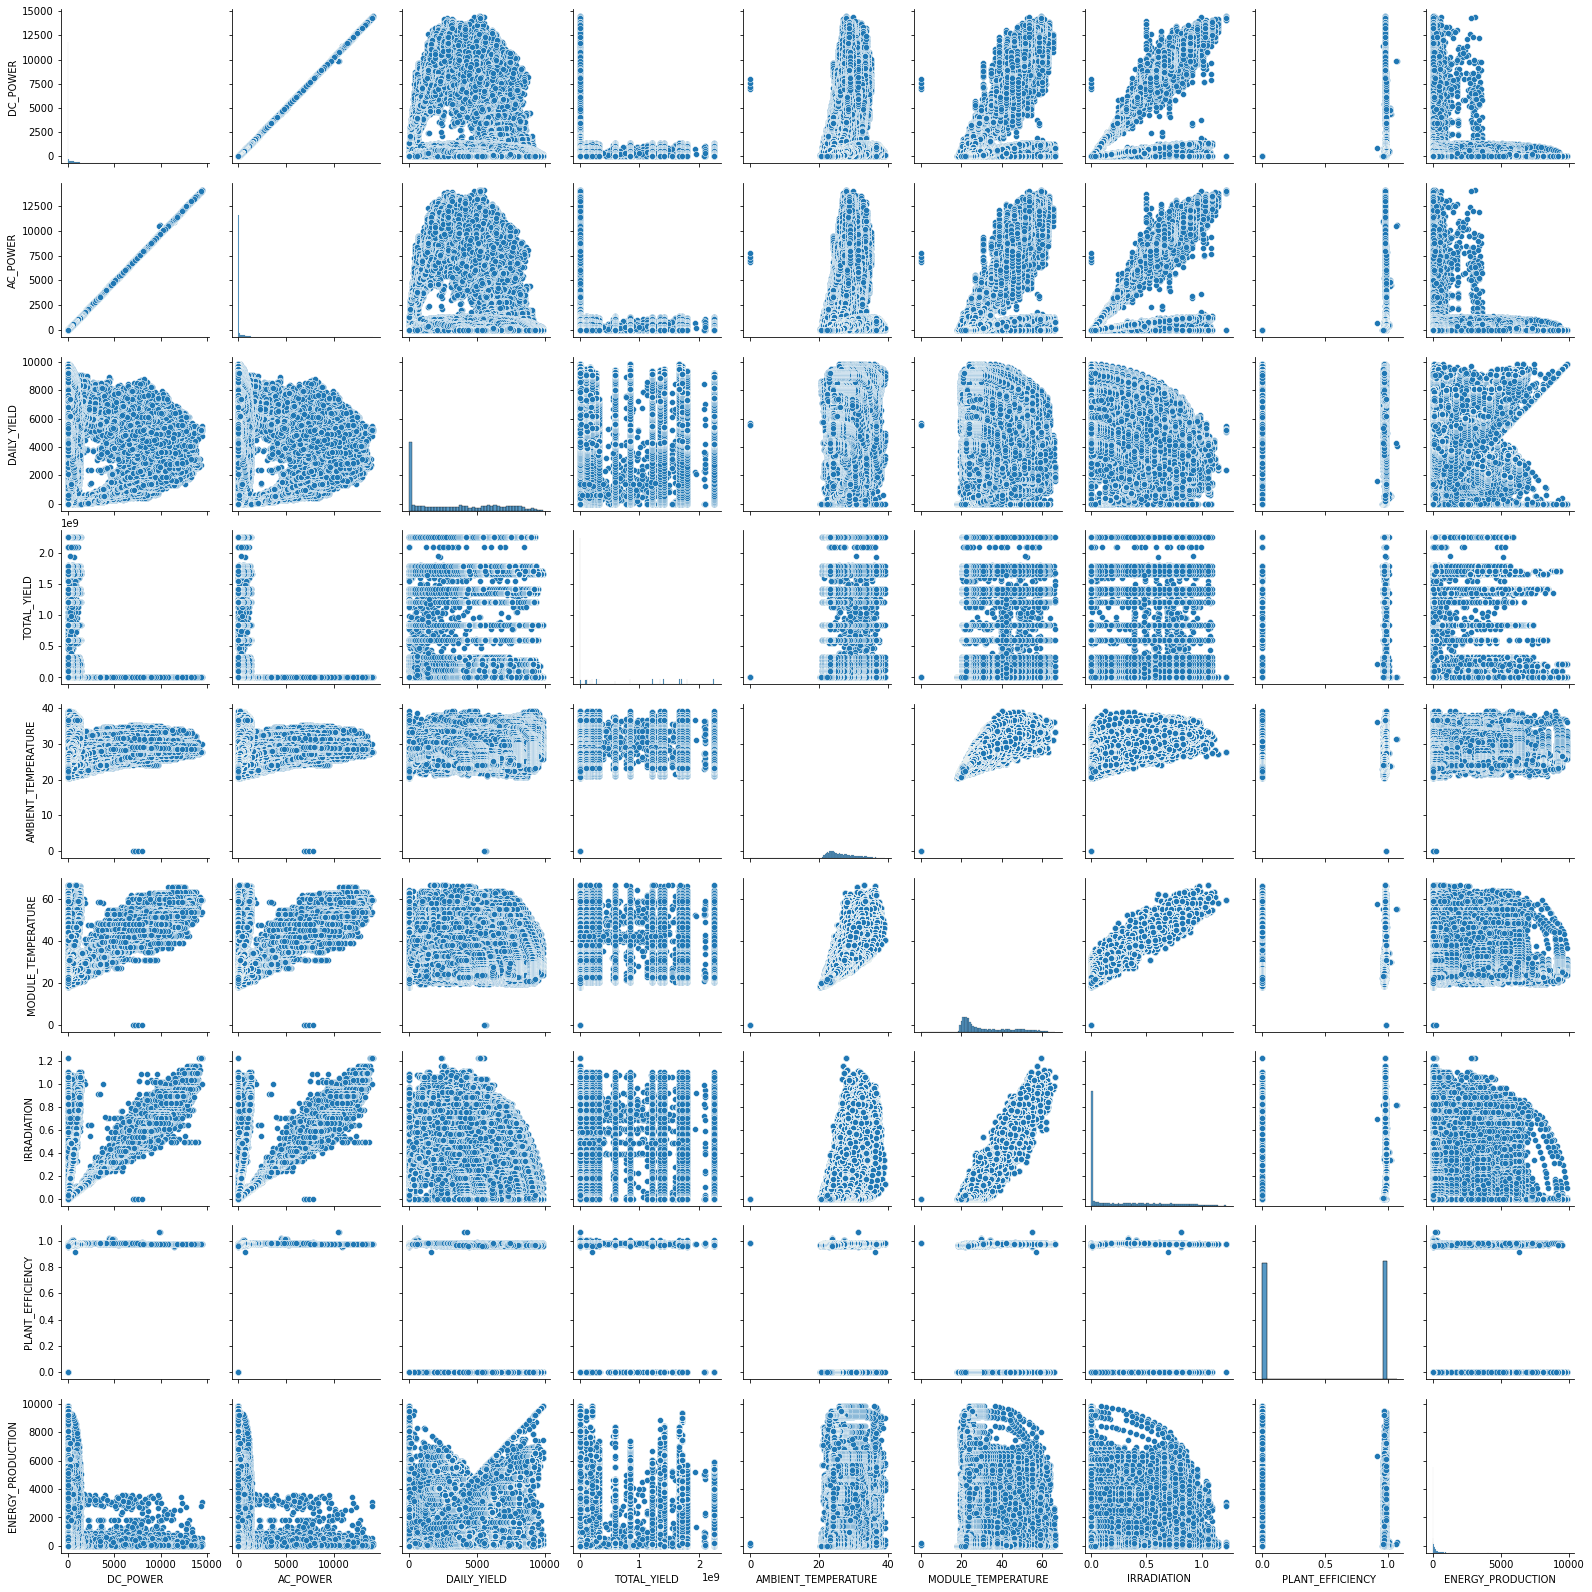

In [30]:
sns.pairplot(df[numerical_cols])

<AxesSubplot:>

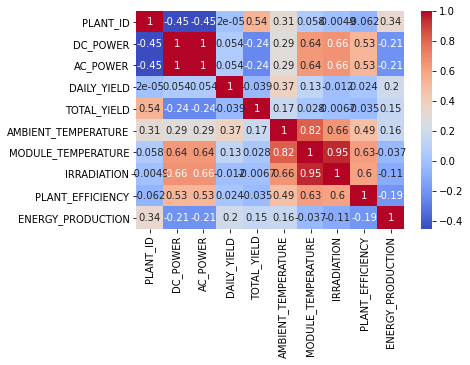

In [31]:
sns.heatmap(df.corr(method='pearson'), annot = True, cmap = 'coolwarm')

In [32]:
df['TIME'] = df['DATE_TIME'].dt.time
df['DATE'] = df['DATE_TIME'].dt.date
df.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,PLANT_EFFICIENCY,ENERGY_PRODUCTION,TIME,DATE
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0.0,0.0,00:00:00,2020-05-15
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0.0,0.0,00:00:00,2020-05-15
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0.0,0.0,00:00:00,2020-05-15
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0.0,0.0,00:00:00,2020-05-15
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0.0,0.0,00:00:00,2020-05-15


### Distributions in 24 hrs span

<function matplotlib.pyplot.show(close=None, block=None)>

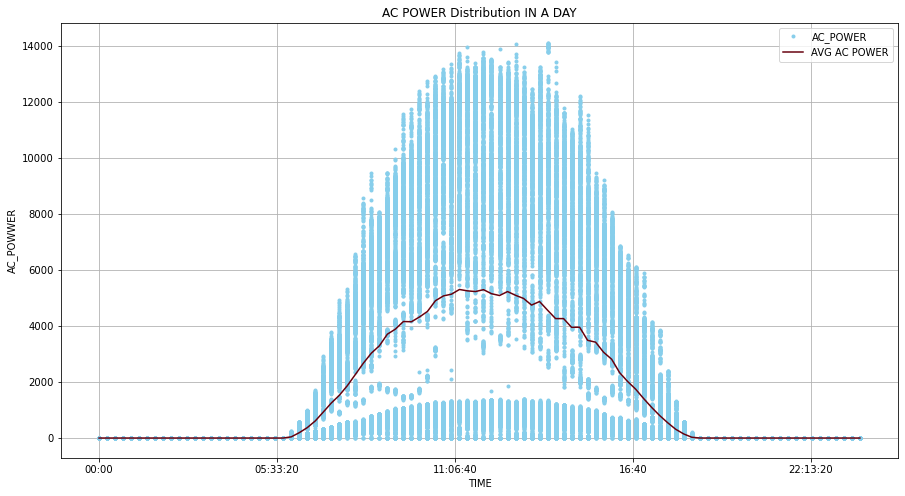

In [33]:
df.plot(x= 'TIME', y='AC_POWER', color = 'skyblue', style='.', figsize = (15, 8))
df.groupby('TIME')['AC_POWER'].mean().plot(cmap = 'Reds_r', legend = True, label = 'AVG AC POWER')
plt.ylabel('AC_POWWER')
plt.title('AC POWER Distribution IN A DAY')
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

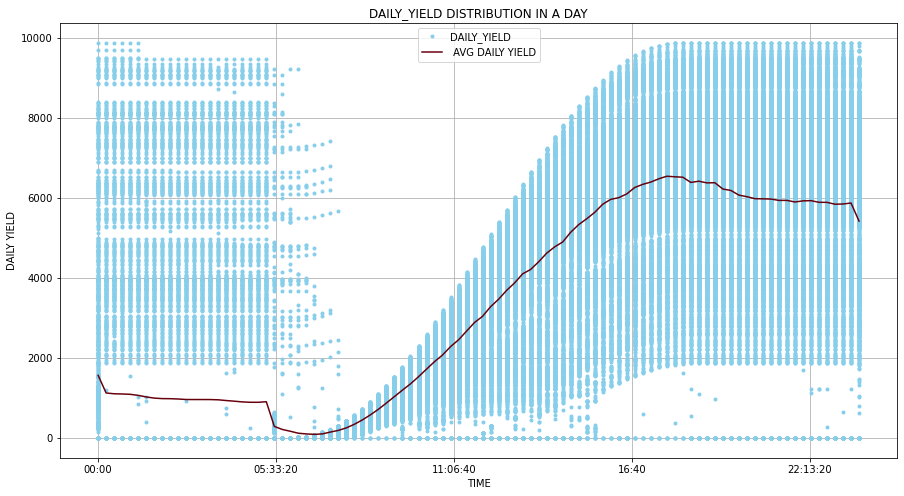

In [34]:
df.plot(x= 'TIME', y='DAILY_YIELD', color = 'skyblue', style='.', figsize = (15, 8))
df.groupby('TIME')['DAILY_YIELD'].mean().plot(cmap = 'Reds_r', legend = True, label = ' AVG DAILY YIELD')
plt.ylabel('DAILY YIELD')
plt.title('DAILY_YIELD DISTRIBUTION IN A DAY')
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

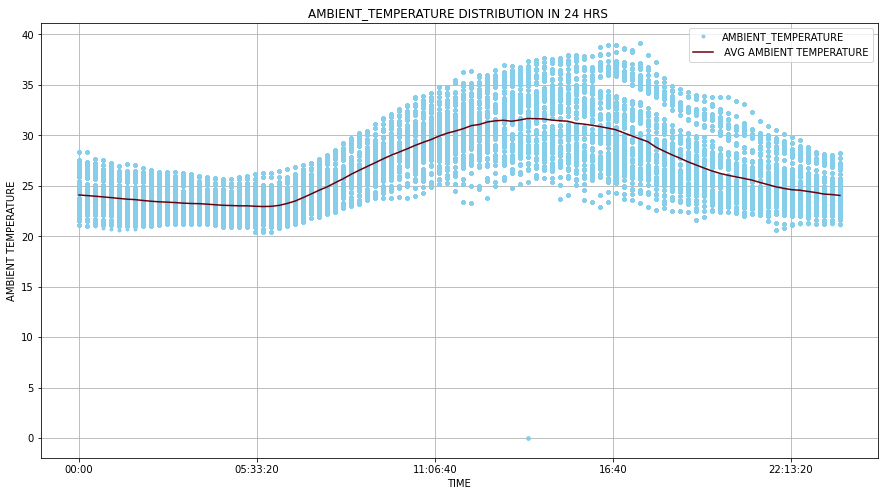

In [35]:
df.plot(x= 'TIME', y='AMBIENT_TEMPERATURE', color = 'skyblue', style='.', figsize = (15, 8))
df.groupby('TIME')['AMBIENT_TEMPERATURE'].mean().plot(cmap = 'Reds_r', legend = True, label = ' AVG AMBIENT TEMPERATURE')
plt.ylabel('AMBIENT TEMPERATURE')
plt.title('AMBIENT_TEMPERATURE DISTRIBUTION IN 24 HRS ')
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

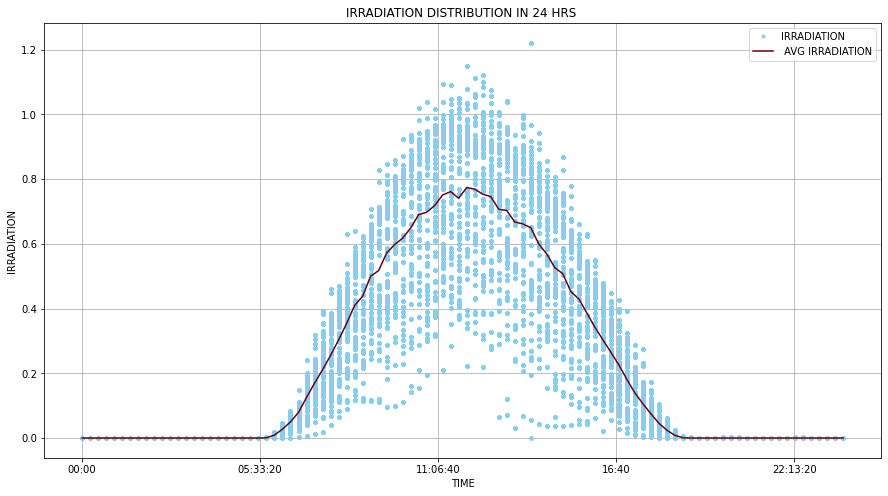

In [36]:
df.plot(x= 'TIME', y='IRRADIATION', color = 'skyblue', style='.', figsize = (15, 8))
df.groupby('TIME')['IRRADIATION'].mean().plot(cmap = 'Reds_r', legend = True, label = ' AVG IRRADIATION')
plt.ylabel('IRRADIATION')
plt.title('IRRADIATION DISTRIBUTION IN 24 HRS ')
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

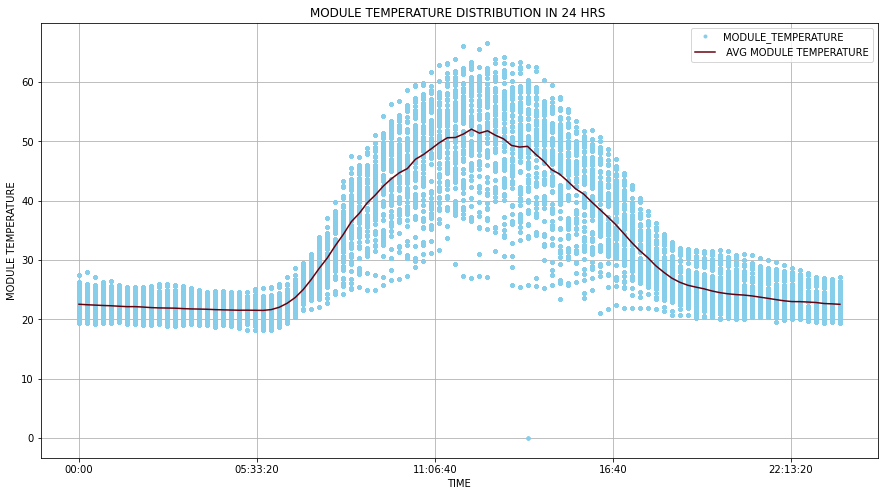

In [37]:
df.plot(x= 'TIME', y='MODULE_TEMPERATURE', color = 'skyblue', style='.', figsize = (15, 8))
df.groupby('TIME')['MODULE_TEMPERATURE'].mean().plot(cmap = 'Reds_r', legend = True, label = ' AVG MODULE TEMPERATURE')
plt.ylabel('MODULE TEMPERATURE')
plt.title('MODULE TEMPERATURE DISTRIBUTION IN 24 HRS ')
plt.grid()
plt.show

### Distribution in 34 Days

<function matplotlib.pyplot.show(close=None, block=None)>

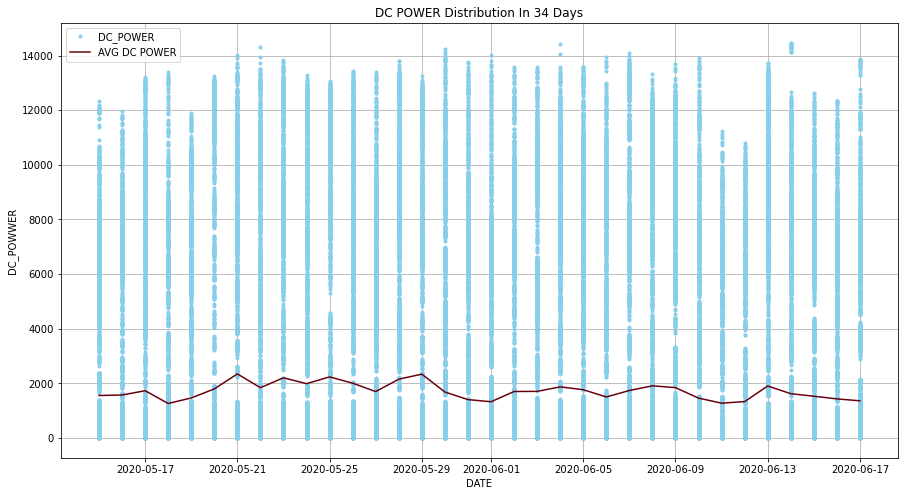

In [38]:
df.plot(x= 'DATE', y='DC_POWER', color = 'skyblue', style='.', figsize = (15, 8))
df.groupby('DATE')['DC_POWER'].mean().plot(cmap = 'Reds_r', legend = True, label= 'AVG DC POWER')
plt.ylabel('DC_POWWER')
plt.title('DC POWER Distribution In 34 Days')
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

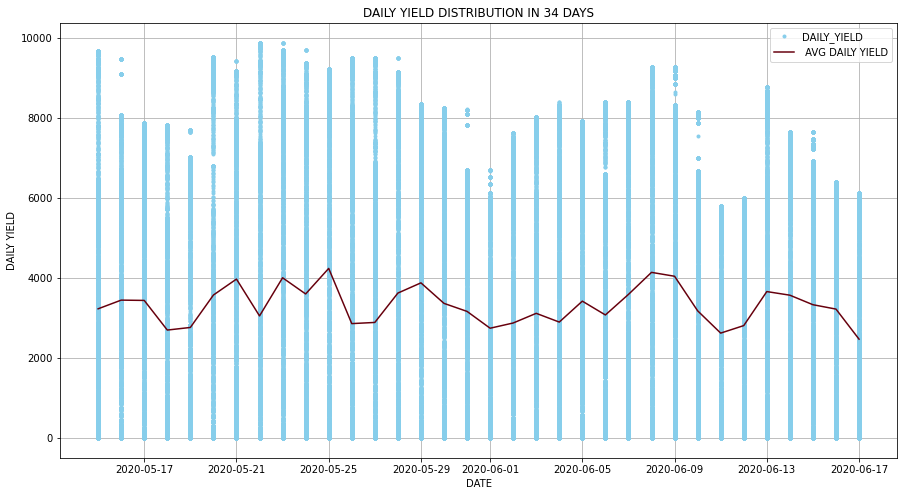

In [39]:
df.plot(x= 'DATE', y='DAILY_YIELD', color = 'skyblue', style='.', figsize = (15, 8))
df.groupby('DATE')['DAILY_YIELD'].mean().plot(cmap = 'Reds_r', legend = True, label = ' AVG DAILY YIELD')
plt.ylabel('DAILY YIELD')
plt.title('DAILY YIELD DISTRIBUTION IN 34 DAYS')
plt.grid()
plt.show

### Feature Selection

In [40]:
df.columns

Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY_x', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD', 'SOURCE_KEY_y', 'AMBIENT_TEMPERATURE',
       'MODULE_TEMPERATURE', 'IRRADIATION', 'PLANT_EFFICIENCY',
       'ENERGY_PRODUCTION', 'TIME', 'DATE'],
      dtype='object')

In [41]:
X = df.drop(df[['DATE_TIME', 'DATE', 'DC_POWER',  'AC_POWER','TIME','PLANT_ID', 'SOURCE_KEY_x', 'SOURCE_KEY_y','DAILY_YIELD', 'TOTAL_YIELD']], axis =1)
y = df.AC_POWER

'''
traget is "Daily effiencey" & Features excluded DC_POWER due to high correlation with AC (only chosen one, the AC), 
DATE/PLANT_ID/SOURCES_KEYS are just constant 

'''

'\ntraget is "Daily effiencey" & Features excluded DC_POWER due to high correlation with AC (only chosen one, the AC), \nDATE/PLANT_ID/SOURCES_KEYS are just constant \n\n'

### Defining my Target & Features

In [42]:
X.head()

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,PLANT_EFFICIENCY,ENERGY_PRODUCTION
0,25.184316,22.857507,0.0,0.0,0.0
1,25.184316,22.857507,0.0,0.0,0.0
2,25.184316,22.857507,0.0,0.0,0.0
3,25.184316,22.857507,0.0,0.0,0.0
4,25.184316,22.857507,0.0,0.0,0.0


In [43]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AC_POWER, dtype: float64

### Extreme Values

#### Extreme_Values_AMBIENT_TEMPERATURE

<AxesSubplot:>

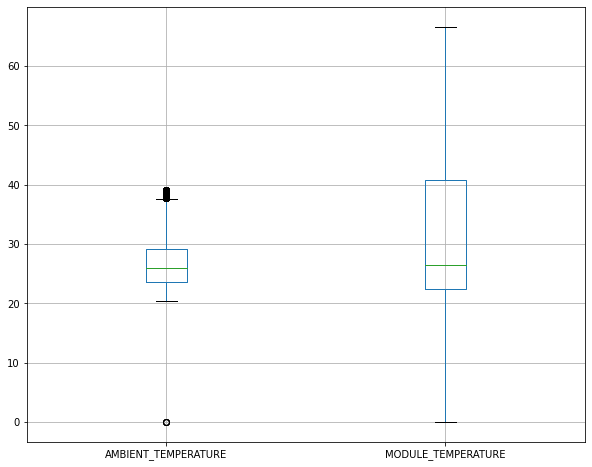

In [44]:
df[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE']].boxplot(figsize = (10,8), grid = True)

In [45]:
#Extreme_Values_AMBIENT_TEMPERATURE

Q1_AT = df['AMBIENT_TEMPERATURE'].quantile(0.25)
Q3_AT = df['AMBIENT_TEMPERATURE'].quantile(0.75)
IQR_AT = Q3_AT - Q1_AT    #IQR is interquartile range 

filter_AMBIENT_TEMPERATURE = (df['AMBIENT_TEMPERATURE'] >= Q1_AT - 1.5 * IQR_AT) & (df['AMBIENT_TEMPERATURE'] <= Q3_AT + 1.5 *IQR_AT)
Extreme_Values_AMBIENT_TEMPERATURE = X.loc[~filter_AMBIENT_TEMPERATURE]['AMBIENT_TEMPERATURE']

Extreme_Values_AMBIENT_TEMPERATURE

38544     0.000000
38545     0.000000
38546     0.000000
38547     0.000000
85288    37.993901
           ...    
88829    38.036724
88830    38.036724
88831    38.036724
88832    38.036724
88833    38.036724
Name: AMBIENT_TEMPERATURE, Length: 382, dtype: float64

#### Extreme_Values_IRRADIATION

<AxesSubplot:>

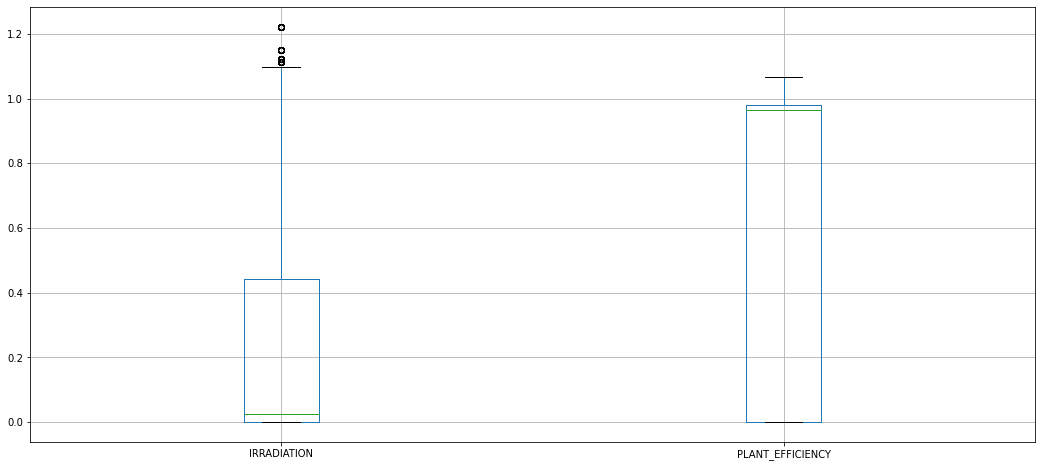

In [46]:
df[['IRRADIATION','PLANT_EFFICIENCY']].boxplot(figsize = (18,8), grid = True)

In [47]:
#Extreme_IRRADIATION

Q1_IR = df['IRRADIATION'].quantile(0.25)
Q3_IR = df['IRRADIATION'].quantile(0.75)
IQR_IR = Q3_IR - Q1_IR    #IQR is interquartile range 

filter_IRRADIATION = (df['IRRADIATION'] >= Q1_IR - 1.5 * IQR_IR) & (df['IRRADIATION'] <= Q3_IR + 1.5 *IQR_IR)
Extreme_IRRADIATION = X.loc[~filter_IRRADIATION]['IRRADIATION']

Extreme_IRRADIATION

16116    1.112297
16117    1.112297
16118    1.112297
16119    1.112297
16120    1.112297
           ...   
61623    1.221652
61624    1.221652
61625    1.221652
61626    1.221652
61627    1.221652
Name: IRRADIATION, Length: 88, dtype: float64

#### Extreme_Values_ENERGY_PRODUCTION

<AxesSubplot:>

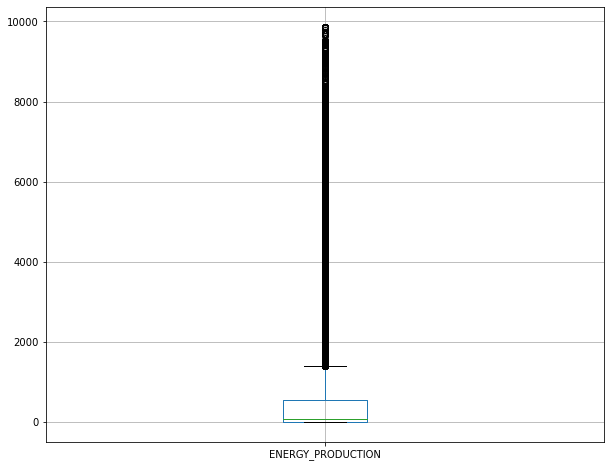

In [48]:
X.boxplot(column = 'ENERGY_PRODUCTION', figsize = (10,8), grid = True)

In [49]:
#Extreme_Values_ENERGY_PRODUCTION

Q1_EP = df['ENERGY_PRODUCTION'].quantile(0.25)
Q3_EP = df['ENERGY_PRODUCTION'].quantile(0.75)
IQR_EP = Q3_EP - Q1_EP    #IQR is interquartile range 

filter_ENERGY_PRODUCTION = (df['ENERGY_PRODUCTION'] >= Q1_EP - 1.5 * IQR_EP) & (df['ENERGY_PRODUCTION'] <= Q3_EP + 1.5 *IQR_EP)
Extreme_Values_ENERGY_PRODUCTION = X.loc[~filter_ENERGY_PRODUCTION]['ENERGY_PRODUCTION']

Extreme_Values_ENERGY_PRODUCTION

1778      5754.000000
1781      6471.000000
1782      6471.000000
1784      6291.000000
1785      6291.000000
             ...     
134405    2567.600000
134407    2841.066667
135573    2654.066667
135617    1820.733333
136475    4316.000000
Name: ENERGY_PRODUCTION, Length: 24631, dtype: float64

In [50]:
#Extreme_Values_AC_POWER

Q1_AC = df['AC_POWER'].quantile(0.25)
Q3_AC = df['AC_POWER'].quantile(0.75)
IQR_AC = Q3_AC - Q1_AC    #IQR is interquartile range 

filter_AC_POWER = (df['AC_POWER'] >= Q1_AC - 1.5 * IQR_AC) & (df['AC_POWER'] <= Q3_AC + 1.5 *IQR_AC)
Extreme_Values_AC_POWER = df.loc[~filter_AC_POWER]['AC_POWER']

Extreme_Values_AC_POWER

684      3186.714286
688      3150.500000
689      2826.750000
691      2839.428571
692      3075.875000
            ...     
68113    3439.500000
68114    3431.750000
68115    3361.500000
68116    3440.857143
68117    3377.857143
Name: AC_POWER, Length: 26307, dtype: float64

#### Standaradization Vs. Normalization

In [51]:
#NORMALIZATION
from sklearn.preprocessing import MinMaxScaler

In [52]:
df_Norm = X.copy()

In [53]:
Min_Max_scaler = MinMaxScaler()

In [54]:
Min_Max_scaled_X_train = Min_Max_scaler.fit_transform(df_Norm)

<AxesSubplot:>

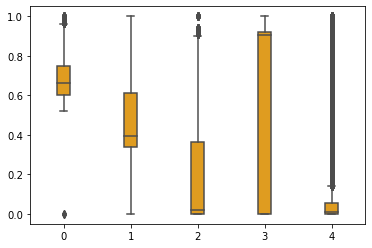

In [55]:
sns.boxplot(data = Min_Max_scaled_X_train, width = 0.2, color = 'orange')

<AxesSubplot:ylabel='Count'>

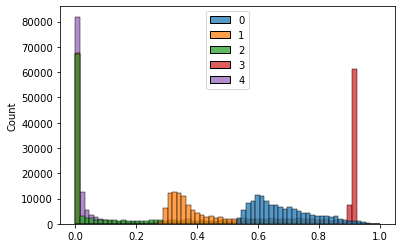

In [56]:
sns.histplot(data = Min_Max_scaled_X_train)

In [57]:
np.std(Min_Max_scaled_X_train)

0.3393105764293107

In [58]:
np.mean(Min_Max_scaled_X_train)

0.38063792901812765

#### Standardization

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [61]:
df_SS = X.copy()

In [62]:
scaled = scaler.fit_transform(df_SS)

<AxesSubplot:>

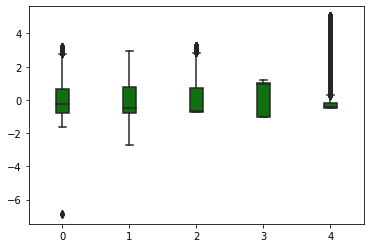

In [63]:
sns.boxplot(data = scaled, width = 0.2, color = 'green')

<AxesSubplot:ylabel='Count'>

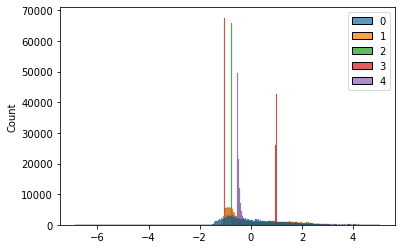

In [64]:
sns.histplot(data = scaled)

In [65]:
np.mean(scaled)

8.428588785010764e-17

In [66]:
np.std(scaled)

1.0

In [67]:
X.columns

Index(['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
       'PLANT_EFFICIENCY', 'ENERGY_PRODUCTION'],
      dtype='object')

<AxesSubplot:>

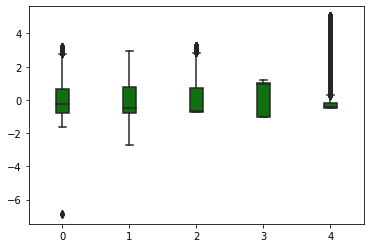

In [68]:
df_SS_clean = X.copy()
scaled_clean = scaler.fit_transform(df_SS_clean)
sns.boxplot(data = scaled_clean, width = 0.2, color = 'green')

<AxesSubplot:ylabel='Count'>

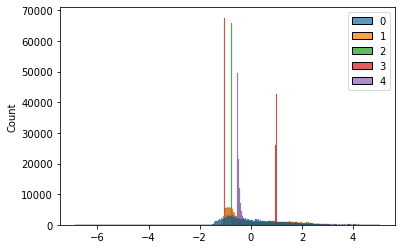

In [69]:
sns.histplot(data = scaled_clean)

In [70]:
# I have more condidence to choose Standarization with filtered dataset mean =0 & std = 1

### Machine Learning with the 6 features and Standarization 

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

#### Aplying STD on train set and test seperately 

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()

In [75]:
y_train = np.array(y_train).reshape(-1,1)

In [76]:
scaled_X_train = scaler.fit_transform(X_train)

In [77]:
scaled_y_train = scaler.fit_transform(y_train)

In [78]:
from sklearn.neighbors import KNeighborsRegressor

### n = 5

In [79]:
knn_5 = KNeighborsRegressor(n_neighbors= 5)

In [80]:
knn_5.fit(scaled_X_train, scaled_y_train)

KNeighborsRegressor()

In [81]:
pred_5 = knn_5.predict(scaled_X_train)

In [82]:
knn_5.score(scaled_X_train, scaled_y_train)

0.9826703776530202

In [83]:
scaled_X_test = scaler.fit_transform(X_test)

In [84]:
scaled_y_test = scaler.fit_transform(np.array(y_test).reshape(-1,1))

In [85]:
pred_5 = knn_5.predict(scaled_X_test)

In [86]:
knn_5.score(scaled_X_test, scaled_y_test)

0.9619870574507534

In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [88]:
print('MAE:  ', mean_absolute_error(scaled_y_test, pred_5))
print('MSE:  ', mean_squared_error(scaled_y_test, pred_5))
print('RMSE: ', np.sqrt(mean_squared_error(scaled_y_test, pred_5)))

MAE:   0.0572104327864642
MSE:   0.038012942549246635
RMSE:  0.19496908100836563


### n = 11

In [89]:
knn_11 = KNeighborsRegressor(n_neighbors= 11)
knn_11.fit(scaled_X_train, scaled_y_train)
pred_11_trained = knn_11.predict(scaled_X_train)
knn_11.score(scaled_X_train, scaled_y_train)

0.9630876298139438

In [90]:
pred_11 = knn_11.predict(scaled_X_test)
knn_11.score(scaled_X_test, scaled_y_test)

0.9440800482286014

In [91]:
print('MAE:  ', mean_absolute_error(scaled_y_test, pred_11))
print('MSE:  ', mean_squared_error(scaled_y_test, pred_11))
print('RMSE: ', np.sqrt(mean_squared_error(scaled_y_test, pred_11)))

MAE:   0.07518057104621456
MSE:   0.05591995177139858
RMSE:  0.23647399808731315


### n =15

In [92]:
knn_15 = KNeighborsRegressor(n_neighbors= 15)
knn_15.fit(scaled_X_train, scaled_y_train)
pred_15_trained = knn_15.predict(scaled_X_train)
knn_15.score(scaled_X_train, scaled_y_train)

0.9503372026726555

In [93]:
pred_15 = knn_15.predict(scaled_X_test)
knn_15.score(scaled_X_test, scaled_y_test)

0.9310728086256757

In [94]:
print('MAE:  ', mean_absolute_error(scaled_y_test, pred_15))
print('MSE:  ', mean_squared_error(scaled_y_test, pred_15))
print('RMSE: ', np.sqrt(mean_squared_error(scaled_y_test, pred_15)))

MAE:   0.08827084930998526
MSE:   0.06892719137432436
RMSE:  0.2625398853018801


### weight = 'distance' & n= 5

In [95]:
knn_5 = KNeighborsRegressor(n_neighbors= 5, weights= 'distance')
knn_5.fit(scaled_X_train, scaled_y_train)
pred_5_trained = knn_5.predict(scaled_X_train)
knn_5.score(scaled_X_train, scaled_y_train)

1.0

In [96]:
pred_5 = knn_5.predict(scaled_X_test)
knn_5.score(scaled_X_test, scaled_y_test)

0.9675837966207006

In [97]:
print('MAE:  ', mean_absolute_error(scaled_y_test, pred_5))
print('MSE:  ', mean_squared_error(scaled_y_test, pred_5))
print('RMSE: ', np.sqrt(mean_squared_error(scaled_y_test, pred_5)))

MAE:   0.053356637087856464
MSE:   0.0324162033792994
RMSE:  0.1800450037610025


#### Applying Grid Search Technique to evaluate multiple hyperparameters  

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
from sklearn.metrics import accuracy_score

In [100]:
accuracy_score

<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>

In [101]:
knn_pid_search = GridSearchCV(estimator=KNeighborsRegressor(), cv=10, 
                              param_grid=dict(n_neighbors=[5,11,15], 
                              p=[1, 2, 3, 4],  weights= ['uniform', 'distance']), scoring='accuracy')

In [102]:
knn_pid_search.fit(scaled_X_train, scaled_y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [5, 11, 15], 'p': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [103]:
knn_pid_search.best_estimator_

KNeighborsRegressor(p=1)

In [104]:
knn_pid_search.param_grid

{'n_neighbors': [5, 11, 15],
 'p': [1, 2, 3, 4],
 'weights': ['uniform', 'distance']}

### KNN best_params_ Winners

In [105]:
knn_pid_search.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

### Learning Curve

In [106]:
from sklearn.model_selection import learning_curve

In [116]:
df.shape

(136501, 15)

In [140]:
data_sizes, training_scores, validation_scores = learning_curve(KNeighborsRegressor(n_neighbors= 5, p= 1, weights='uniform'), 
X = scaled_X_train, y =scaled_y_train, cv=10,error_score=0, scoring='neg_mean_squared_error', train_sizes= np.array([1, 1000, 20000, 50000 , 60000, 80000]))

In [141]:
display(data_sizes)

array([    1,  1000, 20000, 50000, 60000, 80000])

In [142]:
training_scores

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.10816511, -0.12970175, -0.12970175, -0.12970175, -0.12970175,
        -0.12970175, -0.12970175, -0.12970175, -0.12970175, -0.12970175],
       [-0.0491707 , -0.05132196, -0.05406062, -0.05344922, -0.05344922,
        -0.05344922, -0.05344922, -0.05344922, -0.05344922, -0.05344922],
       [-0.01904775, -0.01746133, -0.01901399, -0.0184095 , -0.01833232,
        -0.01837944, -0.0182499 , -0.0182499 , -0.0182499 , -0.0182499 ],
       [-0.01569041, -0.01465962, -0.01546937, -0.01539077, -0.01476097,
        -0.01555907, -0.01527047, -0.0152669 , -0.0152669 , -0.0152669 ],
       [-0.01244113, -0.01207087, -0.0122798 , -0.01228642, -0.01183923,
        -0.0121412 , -0.0123295 , -0.01182145, -0.01188957, -0.01203191]])

In [143]:
display(training_scores)
display(training_scores.shape)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.10816511, -0.12970175, -0.12970175, -0.12970175, -0.12970175,
        -0.12970175, -0.12970175, -0.12970175, -0.12970175, -0.12970175],
       [-0.0491707 , -0.05132196, -0.05406062, -0.05344922, -0.05344922,
        -0.05344922, -0.05344922, -0.05344922, -0.05344922, -0.05344922],
       [-0.01904775, -0.01746133, -0.01901399, -0.0184095 , -0.01833232,
        -0.01837944, -0.0182499 , -0.0182499 , -0.0182499 , -0.0182499 ],
       [-0.01569041, -0.01465962, -0.01546937, -0.01539077, -0.01476097,
        -0.01555907, -0.01527047, -0.0152669 , -0.0152669 , -0.0152669 ],
       [-0.01244113, -0.01207087, -0.0122798 , -0.01228642, -0.01183923,
        -0.0121412 , -0.0123295 , -0.01182145, -0.01188957, -0.01203191]])

(6, 10)

In [144]:
display(validation_scores)
display(validation_scores.shape)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.18896253, -0.18301665, -0.1837422 , -0.18580703, -0.18710337,
        -0.17878513, -0.185213  , -0.18786501, -0.18435344, -0.19770264],
       [-0.08744881, -0.09259532, -0.07872573, -0.0796608 , -0.08284651,
        -0.07676359, -0.08530896, -0.08154489, -0.08362174, -0.08560341],
       [-0.03476689, -0.03360556, -0.03163038, -0.03136874, -0.03194882,
        -0.02755046, -0.0339365 , -0.03120262, -0.03773165, -0.03082811],
       [-0.02818826, -0.02823779, -0.02644414, -0.02571679, -0.02523444,
        -0.02128625, -0.02770043, -0.02591143, -0.03277583, -0.02438802],
       [-0.02163736, -0.02043539, -0.02142701, -0.01914546, -0.02010691,
        -0.01667741, -0.02048383, -0.02004093, -0.02632934, -0.01825138]])

(6, 10)

In [145]:
training_mean = - training_scores.mean(axis=1) 
training_standard_deviation = -training_scores.std(axis=1) 

In [146]:
validation_mean = - validation_scores.mean(axis=1) 
validation_standard_deviation =- validation_scores.std(axis=1)

In [147]:
import plotly.graph_objects as go

In [148]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data_sizes, 
                        y=training_mean,
                        mode='lines',
                        name='Training',
                        line=dict(color='red')))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=training_mean - training_standard_deviation,
                        mode='lines',
                        name='Training lower bound',
                        line=dict(width=0, color='red'),
                        showlegend=False))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=training_mean + training_standard_deviation,
                        mode='lines',
                        name='Training upper bound',
                        line=dict(width=0, color='red'),
                        fill='tonexty',
                        fillcolor='rgba(255, 0, 0, 0.3)',
                        showlegend=False))

fig.add_trace(go.Scatter(x=data_sizes, 
                        y=validation_mean,
                        mode='lines',
                        name='Validation',
                        line=dict(color='blue')))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=validation_mean - validation_standard_deviation,
                        mode='lines',
                        name='Validation lower bound',
                        line=dict(width=0, color='blue'),
                        showlegend=False))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=validation_mean + validation_standard_deviation,
                        mode='lines',
                        name='Validation upper bound',
                        line=dict(width=0, color='blue'),
                        fill='tonexty',
                        fillcolor='rgba(0, 0, 255, 0.3)',
                        showlegend=False))

fig.update_layout(title='Learning curve',
                 xaxis_title='Dataset size',
                 yaxis_title='Accuracy')
fig.show()